## Point 1

In [1]:
# import necessary packages, and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# dataframe creation with the help of pandas
df = pd.read_csv("task1.csv")
df.head()

,x1,x2,x3,x4,x5,y
0,-4.221195,-2.312597,20.479732,-10.278535,5.224368,-183.078704
1,-0.672750,-1.776187,20.456802,-10.645520,5.453415,-182.279376
2,4.554193,-1.496179,22.078333,-11.014485,5.476684,-192.604949
3,-1.597440,-3.792574,22.028051,-10.250194,5.583333,-194.414500
4,0.057342,-2.247027,22.367812,-10.891777,6.313657,-196.512838


In [35]:
df.info() # informations of the attributes of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      250 non-null    float64
 1   x2      250 non-null    float64
 2   x3      250 non-null    float64
 3   x4      250 non-null    float64
 4   x5      250 non-null    float64
 5   y       250 non-null    float64
dtypes: float64(6)
memory usage: 11.8 KB


In [36]:
df.corr() # analysis of the correlation values

,x1,x2,x3,x4,x5,y
x1,1.000000,0.096341,0.012348,-0.062350,0.083292,0.103080
x2,0.096341,1.000000,0.036391,-0.022901,0.107425,0.133388
x3,0.012348,0.036391,1.000000,-0.675921,-0.012837,-0.949708
x4,-0.062350,-0.022901,-0.675921,1.000000,0.034274,0.810280
x5,0.083292,0.107425,-0.012837,0.034274,1.000000,0.036854
y,0.103080,0.133388,-0.949708,0.810280,0.036854,1.000000


<AxesSubplot: >

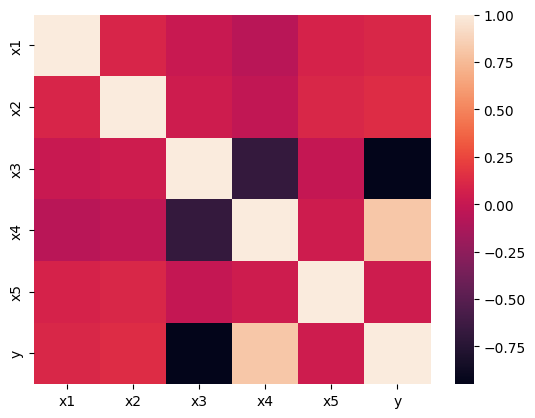

In [37]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns) # heat map using correlation method

In [38]:
X = df.drop("y", axis=1) # X variable with first five columns
Y = df["y"] # Y variable with respect to y column

In [39]:
# test and train data spliting
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state= 42)

In [40]:
# regression model creation
reg_mod = LinearRegression()
model_val = reg_mod.fit(x_train,y_train)

In [12]:
#RMSE value calcuation for train data
rmse_train = np.sqrt(mean_squared_error(y_train, model_val.predict(x_train)))
rmse_train

0.48284275049010356

In [13]:
# RMSE value calculation for test data
rmse_test = np.sqrt(mean_squared_error(y_test, model_val.predict(x_test)))
rmse_test

0.6440979751706583

In [17]:
# score of the model
model_val.score(x_train, y_train) 

0.9961488577009926

In [22]:
# score of the model
# model_val.score(x_test, y_test) 

In [23]:
# cross validfation score of the model
cross_val_score(model_val, x_train,  y_train, cv= 10, scoring="r2").mean()

0.9954619175394738

In [24]:
# cross validfation score of the model
# cross_val_score(model_val, x_test,  y_test, cv= 10, scoring="r2").mean()

In [25]:
y_predicted = reg_mod.predict(x_test) # prediction of the model
r2_score(y_test, y_predicted) # R2 score calcuation with respect to test, and predicted values of the model

0.9944074057161745

## Point 2 

In [26]:
df_new = df.drop(["x2","x3","x4","x5"], axis=1) # creation of new dataframe using two attributes, x1, and y
df_new.head()

,x1,y
0,-4.221195,-183.078704
1,-0.672750,-182.279376
2,4.554193,-192.604949
3,-1.597440,-194.414500
4,0.057342,-196.512838


In [27]:
X1 = df_new.drop("y", axis=1) # define X1 by using x1 column value
Y1 = df_new["y"] # define Y1 by using y column value

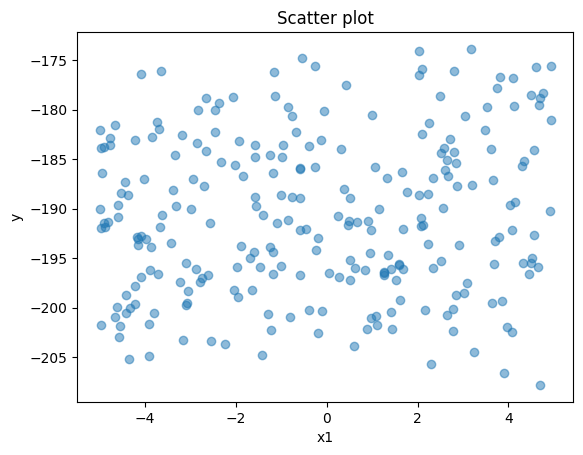

In [28]:
plt.scatter(X1, Y1, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x1')
plt.ylabel('y')
plt.show() # scatter plot between X1, and Y1

In [29]:
df_new1 = df.drop(["x1","x2","x3","x4"], axis=1) # creation of new dataframe using two attributes, x5, and y
df_new1.head()

,x5,y
0,5.224368,-183.078704
1,5.453415,-182.279376
2,5.476684,-192.604949
3,5.583333,-194.414500
4,6.313657,-196.512838


In [30]:
X2 = df_new1.drop("y", axis=1) # define X2 by using x5 column value
Y2 = df_new1["y"] # define Y2 by using y column value

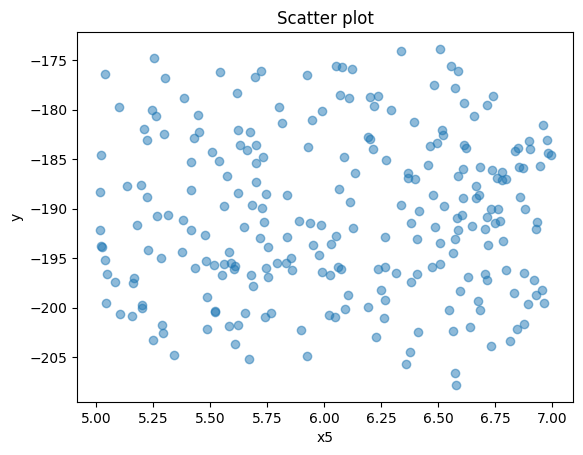

In [31]:
plt.scatter(X2, Y2, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x5')
plt.ylabel('y')
plt.show() # scatter plot between X1, and Y1